In [1]:
import json, os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

results/all/_Freeway12m_10months_12_history_10002000.250.json
results/all/_Freeway12m_10months_12_history_10001000.250.json
results/all/_Freeway12m_10months_12_history_1000100.250.json
results/all/_Freeway12m_10months_12_history_1000500.250.json


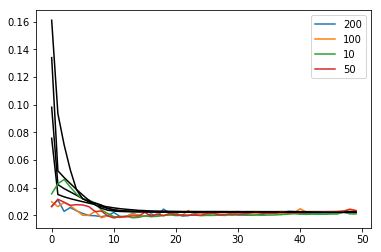

results/all/_Freeway12m_10months_12_history_5002000.250.json
results/all/_Freeway12m_10months_12_history_5001000.250.json
results/all/_Freeway12m_10months_12_history_500100.250.json
results/all/_Freeway12m_10months_12_history_500500.250.json


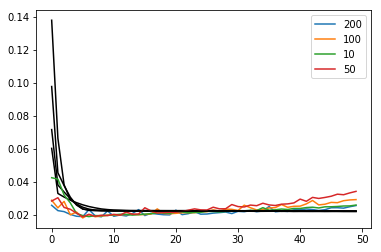

results/all/_Freeway12m_10months_12_history_2002000.250.json
results/all/_Freeway12m_10months_12_history_2001000.250.json
results/all/_Freeway12m_10months_12_history_200100.250.json
results/all/_Freeway12m_10months_12_history_200500.250.json


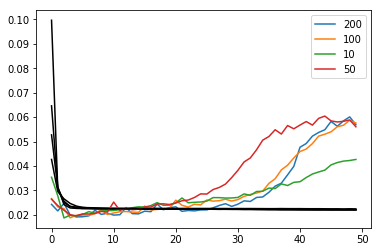

results/all/_Freeway12m_10months_3_history_10002000.250.json
results/all/_Freeway12m_10months_3_history_10001000.250.json
results/all/_Freeway12m_10months_3_history_1000100.250.json
results/all/_Freeway12m_10months_3_history_1000500.250.json


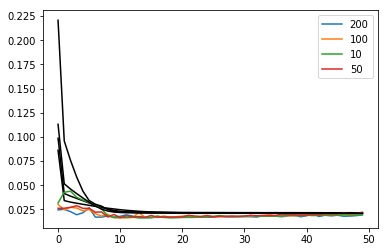

results/all/_Freeway12m_10months_3_history_5002000.250.json
results/all/_Freeway12m_10months_3_history_5001000.250.json
results/all/_Freeway12m_10months_3_history_500100.250.json
results/all/_Freeway12m_10months_3_history_500500.250.json


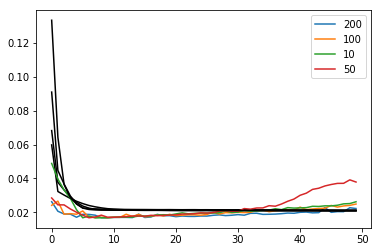

results/all/_Freeway12m_10months_3_history_2002000.250.json
results/all/_Freeway12m_10months_3_history_2001000.250.json
results/all/_Freeway12m_10months_3_history_200100.250.json
results/all/_Freeway12m_10months_3_history_200500.250.json


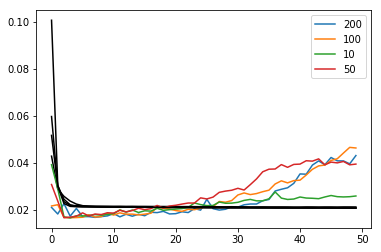

results/all/_Freeway12m_10months_6_history_10002000.250.json
results/all/_Freeway12m_10months_6_history_10001000.250.json
results/all/_Freeway12m_10months_6_history_1000100.250.json
results/all/_Freeway12m_10months_6_history_1000500.250.json


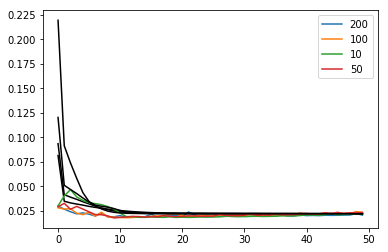

results/all/_Freeway12m_10months_6_history_5002000.250.json
results/all/_Freeway12m_10months_6_history_5001000.250.json
results/all/_Freeway12m_10months_6_history_500100.250.json
results/all/_Freeway12m_10months_6_history_500500.250.json


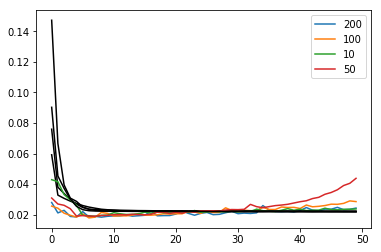

results/all/_Freeway12m_10months_6_history_2002000.250.json
results/all/_Freeway12m_10months_6_history_2001000.250.json
results/all/_Freeway12m_10months_6_history_200100.250.json
results/all/_Freeway12m_10months_6_history_200500.250.json


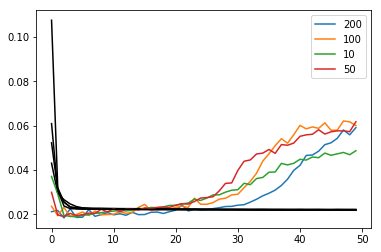

results/all/_Freeway12m_10months_1_history_10002000.250.json
results/all/_Freeway12m_10months_1_history_10001000.250.json
results/all/_Freeway12m_10months_1_history_1000100.250.json
results/all/_Freeway12m_10months_1_history_1000500.250.json


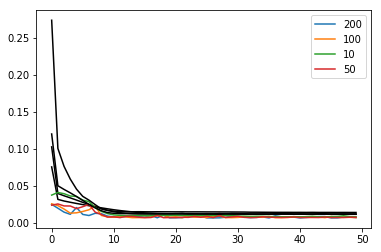

results/all/_Freeway12m_10months_1_history_5002000.250.json
results/all/_Freeway12m_10months_1_history_5001000.250.json
results/all/_Freeway12m_10months_1_history_500100.250.json
results/all/_Freeway12m_10months_1_history_500500.250.json


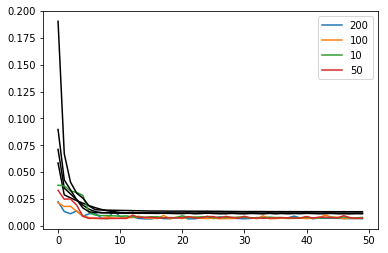

results/all/_Freeway12m_10months_1_history_2002000.250.json
results/all/_Freeway12m_10months_1_history_2001000.250.json
results/all/_Freeway12m_10months_1_history_200100.250.json
results/all/_Freeway12m_10months_1_history_200500.250.json


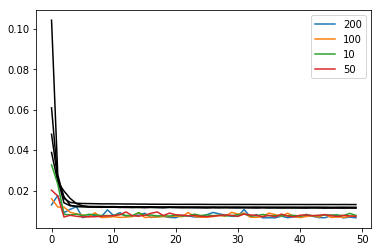

<Figure size 432x288 with 0 Axes>

In [2]:
dir_path = 'results/all/'
histFiles = os.listdir(dir_path)
# batch_size = str(500); epoch = str(150)
# neurons=[10,50,100,200];epochs=[150];dropouts=[0.02,0.2,0.4];batch_sizes=[500]
neurons=[200, 100, 10,50];epochs=[100, 30, 50];dropouts=[0.2];batch_sizes=[1000, 500, 200]
training_data_folder = 'datasets/training_datasets/'
all_csv_files = os.listdir(training_data_folder)
cols =['mean', 'std', 'min', '25%', '50%', '75%', 'max'] 
output_pms =pd.DataFrame(columns=cols)
for cur_tdata_file in all_csv_files:
    filename = cur_tdata_file.split('.csv')[0]
    for batch_size in batch_sizes:
        error_list = [];
        for neuron in neurons:
            for dropout in dropouts:
                for epoch in epochs:
                    fname = dir_path + '_' + filename + '_'+'history_' + str(batch_size) + str(neuron) +str(dropout) +str(epoch) +'.json'
                    if os.path.isfile(fname):
                        print (fname)
                        json_file = open(fname, 'r')
                        loaded_model_json = json.load(json_file)
                        json_file.close()
                        output = loaded_model_json['val_mean_absolute_error']
                        output_main = loaded_model_json['mean_absolute_error']
                        error = abs(sum(list(set(output_main)-set(output)))/len(output))
                        error_list.append(error)
                        if len(error_list)>0:
                                error_list_pms = [np.mean(error_list), np.std(error_list),
                                                  np.min(error_list),np.percentile(error_list,25),
                                                  np.percentile(error_list, 50),np.percentile(error_list, 75),
                                                 np.max(error_list)] 
                                
                        plt.plot(output, label=str(neuron))
                        plt.plot(output_main, 'k')
                        plt.legend()
        output_pms.loc[len(output_pms)] = error_list_pms
        plt.show()
        plt.savefig('results/' + filename + '.png')
output_pms.to_csv('results/boxplot.csv')
#         output_pms =pd.DataFrame(columns=cols)
#         plt.show()
        
        